In [2]:
import pandas as pd

col_title = "Title"
col_abstract = "Abstract"
col_abstract_clean = "Abstract Clean"
col_abstract_lemma = "Abstract Lemma"
col_publication_year= "Publication Year"
col_num_author = "Number of Authors"
col_geographic_term = "Geographic Term"
col_publisher= "Publisher"
col_published_on = "Published On"
col_conference = "Conference"
col_conference_location = "Conference Location"
col_volume = "Volume"
col_issue = "Issue"
col_type = "Type"
col_topic = "Topic"
col_topic_all = "Topic All"
col_geo_clean = col_geographic_term+"clean"
col_geo_sanitized = "Geographic term Sanitized"
col_country_sanitize = "Sanitize"
col_state_sanitize = "Sanitize State"
col_count_weight = "Count Weight"

In [3]:
table = pd.read_pickle('files/4.0 data_with_topic.pkl')
table.head()

,Abstract,Conference,Conference Location,EISSN,Geographic Term,ISSN,Issue,Language,Number of Authors,Publication Year,...,Title,Volume,Type,Abstract Clean,Abstract Lemma,Topic Most Probable,Topic All,Geographic Termclean,Sanitize,Sanitize State
0,Aviation provides productivity in the form of ...,26th International Congress of the Aeronautica...,United States,NaN,[],NaN,NaN,English,4,20080000.0,...,Payload Fuel Energy Efficiency as a Metric for...,NaN,Conference,Aviation provides productivity in the form of ...,aviation provide productivity form transport p...,6,"[0.00037735849056616045, 0.0003773584905661604...",[],[],[]
8,Steam traction was never fully developed befor...,"CORE 2008, Rail; the core of integrated transp...",Australia,NaN,[],NaN,None,NaN,1,20080000.0,...,Feasibility of steam traction for coal transpo...,None,Conference,Steam traction was never fully developed befor...,steam traction be never fully develop be super...,29,"[0.0001652892561983984, 0.0001652892561983984,...",[Argentina],[Argentina],[]
9,The Transport Infrastructure Development Corpo...,"CORE 2008, Rail; the core of integrated transp...",Australia,NaN,[Australia],NaN,None,NaN,1,20080000.0,...,Operational readiness - making it happen,None,Conference,The Transport Infrastructure Development Corpo...,transport infrastructure development corporati...,37,"[0.0004651162790698748, 0.0004651162790698748,...",[Australia],[Australia],[]
10,At CORE 2004 the authors presented a first pap...,"CORE 2008, Rail; the core of integrated transp...",Australia,NaN,[Australia],NaN,None,NaN,2,20080000.0,...,Noise reducing slab track for the Epping to Ch...,None,Conference,At CORE the authors presented a first paper on...,core author present first paper control noise ...,10,"[0.00012820512820518583, 0.0840320449597445, 0...",[Australia],[Australia],[]
11,"Due to the daily congestion of highways, railw...","CORE 2008, Rail; the core of integrated transp...",Australia,NaN,[Australia],NaN,None,NaN,1,20080000.0,...,Investigation into some design aspects of ball...,None,Conference,Due to the daily congestion of highways railwa...,daily congestion highway railway have become m...,20,"[0.00014925373134334178, 0.0001492537313433417...",[Australia],[Australia],[]


In [4]:
del table[col_abstract]
del table[col_abstract_clean]

In [5]:
len(table)

146972

In [6]:
newTable = table[table[col_state_sanitize].apply(lambda x: len(x) >0)]

In [7]:
print(len(newTable))
len(table)

14740


146972

In [23]:
myTable = []
for i, row in newTable.iterrows():
    states = row[col_state_sanitize].copy()
    count_states = len(states)
    weights = row[col_topic_all]
    row[col_topic_all] = [w / count_states for w in weights]
    weight = 1/count_states

    for s in states:
        d = {col_state_sanitize: s, col_count_weight: weight}
        for i, w in enumerate(weights):
            d[f"Topic {i}"] = w/count_states
        myTable.append(d)
myTable = pd.DataFrame(myTable)

In [24]:
myTable.head(5)

,Sanitize State,Count Weight,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49
0,Michigan,1.0,0.000426,0.000426,0.000426,0.033235,0.048160,0.000426,0.000426,0.000426,...,0.000426,0.000426,0.000426,0.000426,0.000426,0.000426,0.000426,0.000426,0.031088,0.000426
1,Minnesota,1.0,0.000171,0.034579,0.000171,0.000171,0.000171,0.000171,0.000171,0.000171,...,0.000171,0.000171,0.000171,0.000171,0.000171,0.013881,0.000171,0.000171,0.000171,0.000171
2,Minnesota,1.0,0.000220,0.433072,0.000220,0.000220,0.042729,0.000220,0.000220,0.000220,...,0.000220,0.000220,0.000220,0.034675,0.000220,0.000220,0.000220,0.000220,0.000220,0.000220
3,Michigan,1.0,0.000204,0.000204,0.000204,0.039670,0.000204,0.000204,0.000204,0.246500,...,0.000204,0.000204,0.000204,0.032713,0.000204,0.016078,0.000204,0.000204,0.000204,0.184465
4,Indiana,1.0,0.000180,0.125621,0.000180,0.000180,0.000180,0.000180,0.000180,0.000180,...,0.000180,0.000180,0.000180,0.000180,0.000180,0.000180,0.000180,0.189490,0.000180,0.000180


In [25]:
myTable.to_pickle("files/6.4 single_state_all_topics.pkl")

In [26]:
sum_by_group = myTable.groupby([col_state_sanitize])[["Topic "+str(x) for x in range(50)]].sum()

In [27]:
sum_by_group['Sum Weight'] = sum_by_group.sum(axis=1)
pivot_table = sum_by_group.sort_values(by = ['Sum Weight'], ascending=False)[:30]
pivot_table = pivot_table.loc[:, pivot_table.columns != 'Sum Weight'].div(pivot_table["Sum Weight"], axis=0)

In [28]:
pivot_table.index.rename("States of USA", inplace = True)

In [29]:
pivot_table

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 40,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49
States of USA,,,,,,,,,,,,,,,,,,,,,
California,0.009307,0.009277,0.023717,0.020022,0.005513,0.016595,0.013368,0.010697,0.011227,0.005391,...,0.009446,0.014026,0.018916,0.008473,0.031582,0.020245,0.009643,0.011549,0.073016,0.028411
Texas,0.008674,0.015834,0.017331,0.019218,0.004061,0.018861,0.010274,0.007270,0.010593,0.007907,...,0.012013,0.010565,0.012369,0.020878,0.031750,0.022846,0.009386,0.021195,0.062269,0.035698
Florida,0.011175,0.014416,0.023585,0.018652,0.004960,0.011255,0.005688,0.010953,0.006632,0.007840,...,0.012314,0.010997,0.021238,0.021585,0.025219,0.013483,0.007269,0.016320,0.073743,0.036168
New York,0.006725,0.005880,0.026113,0.025943,0.005980,0.023929,0.009704,0.011018,0.014983,0.006509,...,0.014752,0.011689,0.013869,0.007168,0.042037,0.015995,0.017780,0.004158,0.069994,0.022012
Washington,0.009428,0.013943,0.027573,0.021108,0.005074,0.010878,0.007954,0.008028,0.012756,0.007921,...,0.014281,0.013968,0.014928,0.016377,0.034242,0.031515,0.007419,0.012691,0.075682,0.024583
Virginia,0.014657,0.024293,0.030632,0.023849,0.007149,0.015743,0.005297,0.016592,0.007014,0.008424,...,0.011308,0.007395,0.014359,0.017911,0.018381,0.011944,0.008024,0.025919,0.073869,0.040015
Minnesota,0.010173,0.010875,0.022733,0.027398,0.005712,0.009986,0.004538,0.016148,0.004108,0.007475,...,0.006138,0.018135,0.016669,0.010145,0.046077,0.009643,0.009532,0.018853,0.061179,0.027683
Illinois,0.008891,0.009217,0.023441,0.019803,0.003580,0.060746,0.007146,0.010324,0.011866,0.005491,...,0.006830,0.009962,0.013684,0.014158,0.039492,0.010352,0.013091,0.029749,0.049116,0.028425
Oregon,0.007248,0.003952,0.019357,0.023166,0.002655,0.006250,0.010288,0.009690,0.006500,0.005696,...,0.009074,0.037672,0.018156,0.018689,0.037050,0.010534,0.012586,0.010596,0.075302,0.035289


In [30]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np
import seaborn as sns

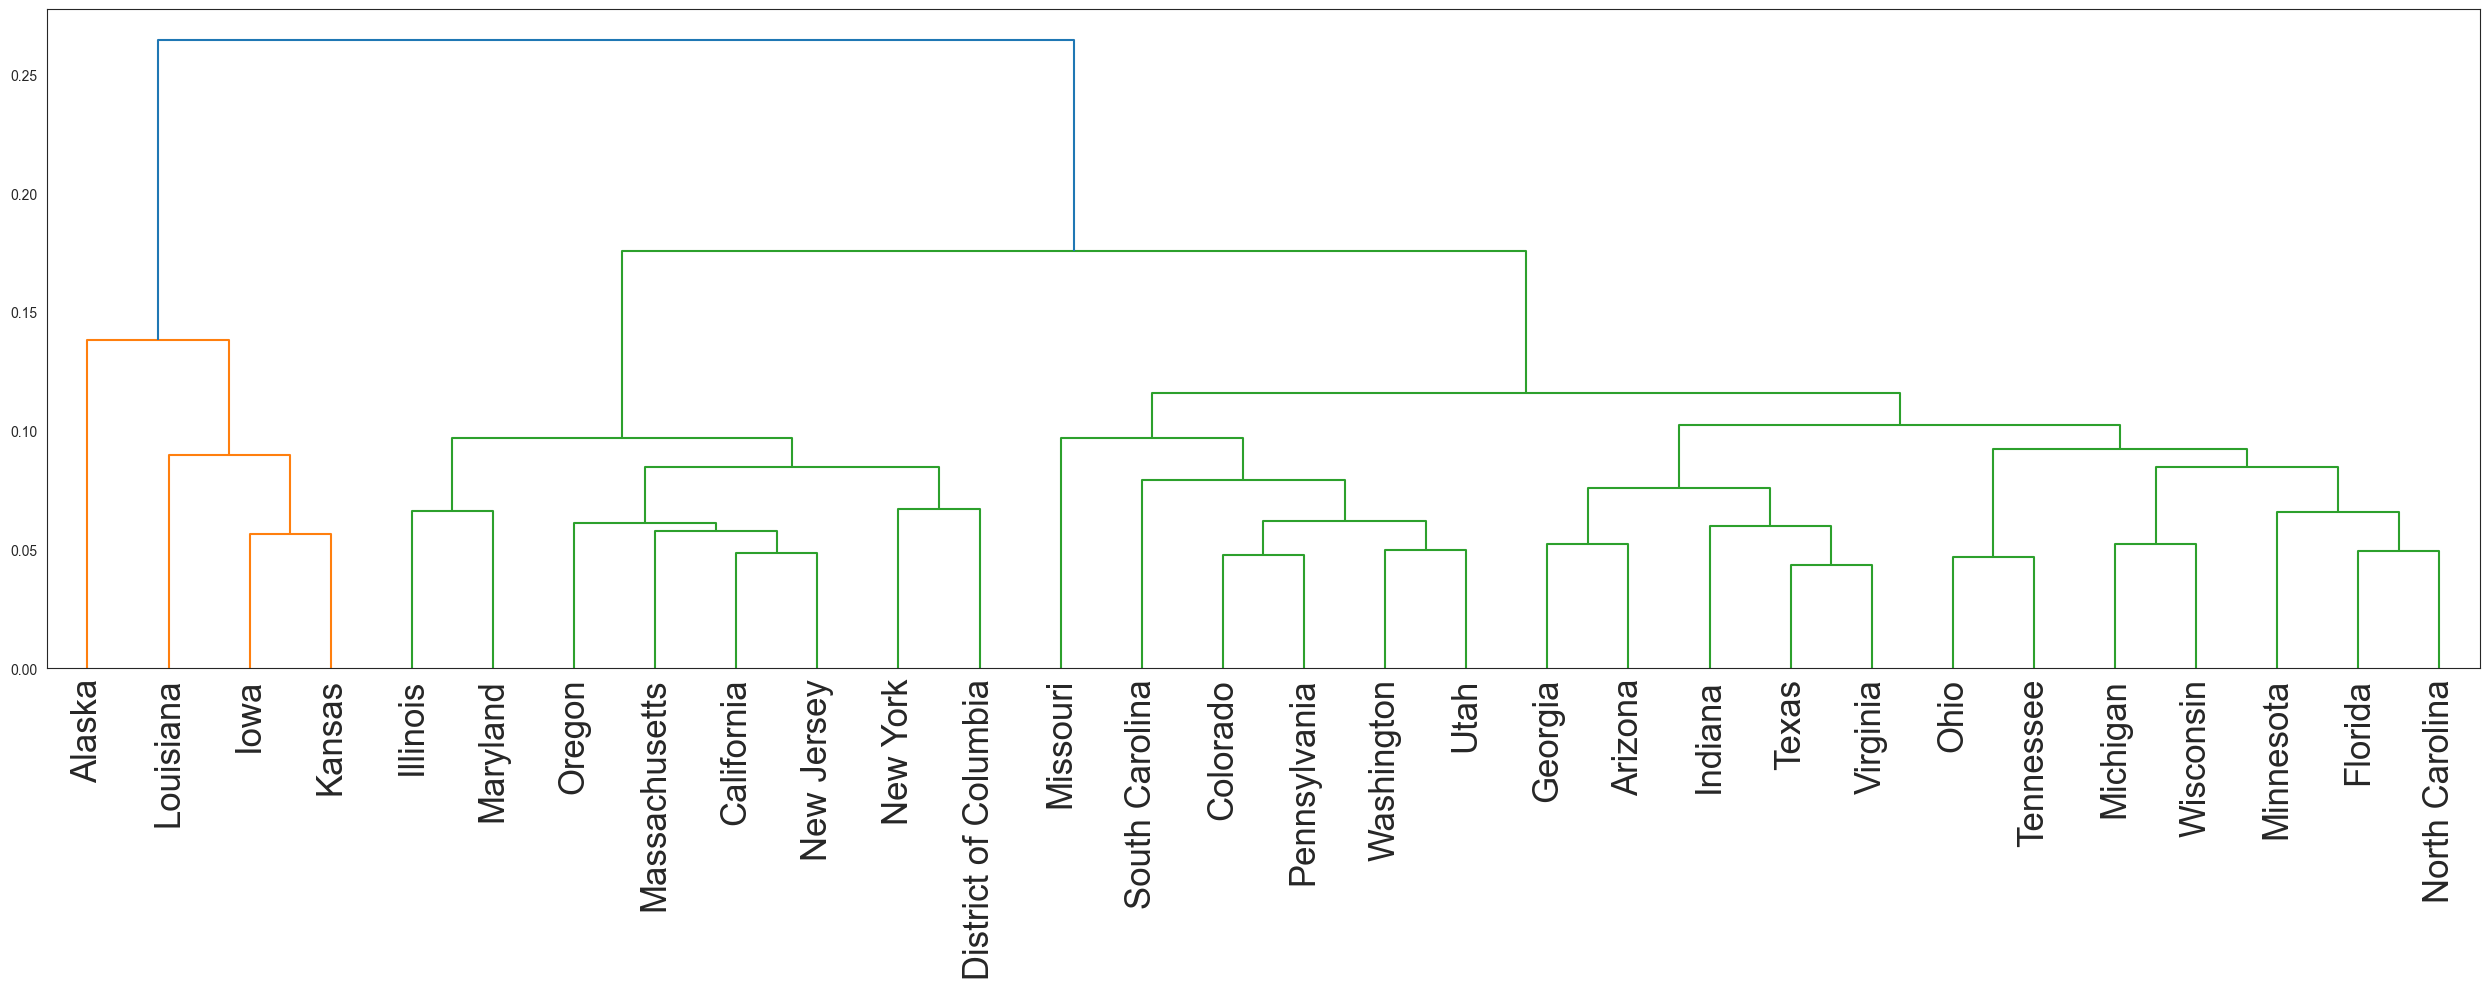

In [32]:
sns.set_style("white")
A = hierarchy.linkage(pivot_table, 'ward')
fig = plt.figure(figsize=(25, 10))
 
# Plot with Custom leaves
dn = hierarchy.dendrogram(A, leaf_rotation=90, leaf_font_size=25, labels=pivot_table.index)
plt.tight_layout()
plt.savefig('fig/6.4 State dendogram.svg', format='svg', dpi=500)
plt.savefig('fig/6.4 State dendogram.pdf', format='pdf', dpi=500)
plt.show()